This problem was adapted from Professor Farimani's paper. If you are interested in learning more, you can read it <a href="https://www.nature.com/articles/s41699-018-0060-8.pdf">here</a>.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# (a)
# data preprocessing
data = pd.read_csv('data.csv')
# print(data)
x = np.zeros((2000,2))
labels = data.columns.values
labels = labels[1::2]

for i in range(0,len(labels)): 
    x[(i*100):(100*(i+1)),:] = data.values[:,(i*2):2*(i+1)]
#     print(x[(i*100):(100*(i+1)),:])

# print(x)

y = np.zeros(100)
for i in range(1,len(labels)):
    temp = np.ones(100)*i
    y = np.concatenate((y,temp))
# print(y)

y_g = np.column_stack((x,y))

# print(y_g)
np.savetxt('data_processed.csv',y_g, delimiter=',')
# print(y_g[:,0])
X_train,X_test,Y_train,Y_test = train_test_split(y_g[:,0:2], y_g[:,2], test_size=0.3)
# print(x.size)
# print(X_train.size)

print(X_train, Y_train)



[[ 191.79    21.737]
 [  69.042 1439.4  ]
 [  70.623 1465.9  ]
 ...
 [  30.148  476.34 ]
 [ 141.9   1060.   ]
 [ 165.3    150.   ]] [ 7. 19. 19. ... 14.  4.  5.]


In [2]:
print(x)

[[1.4600e+00 2.6000e+03]
 [2.1600e+01 2.5000e+03]
 [1.2600e+01 3.2000e+03]
 ...
 [7.3067e+01 1.4419e+03]
 [7.1311e+01 1.4521e+03]
 [7.0910e+01 1.4468e+03]]


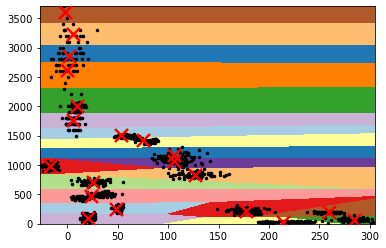

[ 0.  0.  0. ... 19. 19. 19.]


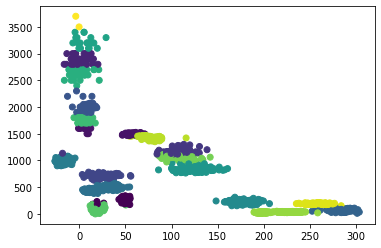

[[ 191.79    21.737]
 [  69.042 1439.4  ]
 [  70.623 1465.9  ]
 ...
 [  30.148  476.34 ]
 [ 141.9   1060.   ]
 [ 165.3    150.   ]] [ 7. 19. 19. ... 14.  4.  5.]


In [3]:
# (b)
# k-means
kmeans = KMeans(n_clusters=20).fit(X_train)
prediction = kmeans.predict(y_g[:,0:2])
h = 1


X_min, X_max = X_train[:,0].min() - 1, X_train[:, 0].max() + 1
Y_min, Y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(Y_min, Y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation = "nearest",extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect="auto",origin="lower", )

plt.plot(X_train[:,0],X_train[:,1],"k.", markersize = 5)
centroids = kmeans.cluster_centers_

plt.scatter(centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=2.5,
    color="r",
    zorder=10,
)
plt.xlim(X_min, X_max)
plt.ylim(Y_min, Y_max)
plt.show()

print(y_g[:,2])
plt.scatter(y_g[:,0:1],y_g[:,1:2],c=prediction)
plt.show()
print(X_train, Y_train)



In [4]:
print(Z)

[[14 14 14 ...  6  6  6]
 [14 14 14 ...  6  6  6]
 [14 14 14 ...  6  6  6]
 ...
 [19 19 19 ... 19 19 19]
 [19 19 19 ... 19 19 19]
 [19 19 19 ... 19 19 19]]


In [5]:
print('Xtrain',X_train)
print('Ytrain',Y_train)
print('Yg',y_g[:,0])
# (c)
#random forest
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)

Xmin, Xmax = X_train[:,0].min() - 1, X_train[:,0].max() + 1
Ymin, Ymax = X_train[:, 1].min() - 1, X_train[:,1].max() + 1

x_x, y_y = np.meshgrid(np.arange(Xmin, Xmax), np.arange(Ymin, Ymax))


print('xx',x_x)
print('yy',y_y)

Z = clf.predict(np.c_[x_x.ravel(), y_y.ravel()])
Z = Z.reshape(x_x.shape)
print('z',Z)

Xtrain [[ 191.79    21.737]
 [  69.042 1439.4  ]
 [  70.623 1465.9  ]
 ...
 [  30.148  476.34 ]
 [ 141.9   1060.   ]
 [ 165.3    150.   ]]
Ytrain [ 7. 19. 19. ... 14.  4.  5.]
Yg [ 1.46  21.6   12.6   ... 73.067 71.311 70.91 ]
xx [[-27.453 -26.453 -25.453 ... 302.547 303.547 304.547]
 [-27.453 -26.453 -25.453 ... 302.547 303.547 304.547]
 [-27.453 -26.453 -25.453 ... 302.547 303.547 304.547]
 ...
 [-27.453 -26.453 -25.453 ... 302.547 303.547 304.547]
 [-27.453 -26.453 -25.453 ... 302.547 303.547 304.547]
 [-27.453 -26.453 -25.453 ... 302.547 303.547 304.547]]
yy [[-3.7000e+00 -3.7000e+00 -3.7000e+00 ... -3.7000e+00 -3.7000e+00
  -3.7000e+00]
 [-2.7000e+00 -2.7000e+00 -2.7000e+00 ... -2.7000e+00 -2.7000e+00
  -2.7000e+00]
 [-1.7000e+00 -1.7000e+00 -1.7000e+00 ... -1.7000e+00 -1.7000e+00
  -1.7000e+00]
 ...
 [ 3.6983e+03  3.6983e+03  3.6983e+03 ...  3.6983e+03  3.6983e+03
   3.6983e+03]
 [ 3.6993e+03  3.6993e+03  3.6993e+03 ...  3.6993e+03  3.6993e+03
   3.6993e+03]
 [ 3.7003e+03  3.7003

xx (3705, 333)
yy (3705, 333)
X_train (1400, 2)
Z (3705, 333)


<Figure size 432x288 with 0 Axes>

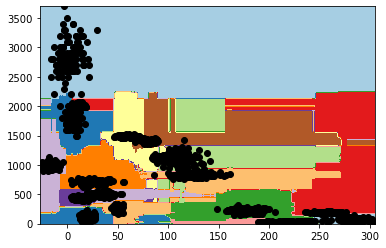

In [6]:
print('xx',x_x.shape)
print('yy',y_y.shape)
print('X_train',X_train.shape)

print('Z',Z.shape)
plt.figure(0)
plt.clf()
plt.show()
plt.imshow(Z,extent=(x_x.min(), x_x.max(), y_y.min(), y_y.max()),cmap=plt.cm.Paired, aspect="auto",origin="lower")

plt.scatter(y_g[:,0:1],y_g[:,1:2],c='black')

# (d)
# Analysis

In this question, unsupervised learning (K-means) is being compared with supervised learning(Random-Forest Method). Comparing the kmeans plot with the Random forest plot, it can be seen that the kmeans boundary plot is slightly overfitting the data. As a result, it can be inferred that kmeans is best when labels are unknown whereas random forest is better when the labels are known.   
